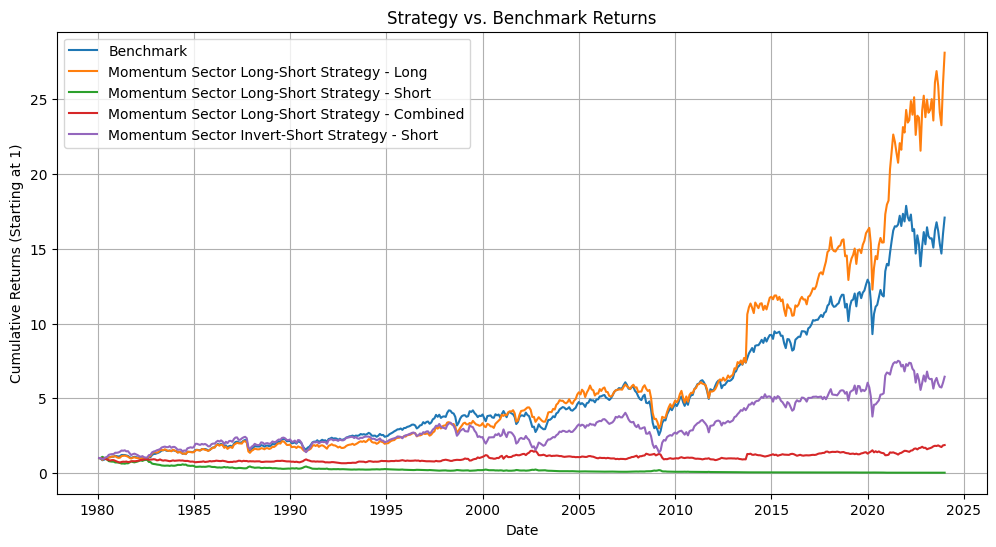

,Annualized Return (%),Annualized Sharpe Ratio,Skewness,Max Drawdown (%),Average Turnover (%)
Strategy,,,,,
Benchmark,6.663,0.3891,-0.5345,-58.25,0.3353
Momentum Sector Long-Short Strategy - Long,7.909,0.4303,0.4339,-49.53,45.06
Momentum Sector Long-Short Strategy - Short,-8.76,-0.4221,0.004418,-98.37,43.99
Momentum Sector Long-Short Strategy - Combined,1.438,0.1035,1.444,-41.88,89.05
Momentum Sector Invert-Short Strategy - Short,4.341,0.2092,-0.003728,-66.17,43.99


In [3]:
# main.ipynb

# Import
import sys
import os
import warnings

# Add the `src` directory to the system path so Python can find modules there
sys.path.append(os.path.join(os.getcwd(), 'src'))
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import modules from `src/`
from config import Config
from data_loader import DataLoader
from strategy.momentum_sector_LS import MomentumSectorLongShortStrategy
from benchmark import Benchmark
from backtest import Backtest
from plotter import plot_returns
from stats_calculator import display_statistics

# Initialize Config and DataLoader
config = Config(transaction_cost_bps=5)
data_loader = DataLoader()

# Initialize Benchmark
benchmark = Benchmark(data_loader, config)
benchmark.calculate_returns()  # Calculate benchmark returns once

# Initialize Strategies
strategies = []

# Strategy 1: Momentum Sector Long-Short Strategy
strategy1 = MomentumSectorLongShortStrategy(data_loader, config)
strategy1.set_parameters(
    num_sectors=5,              # Max is 8
    trading_frequency='M',      # Accepts 'M', '2W', 'W', 'D'
    start_date='1980-01-01',    # Min is 1926-01-01
    end_date=None,              # Default is 2023-12-31
    legs='all',                 # Accepts 'L', 'S', 'LS, 'all'
)
strategy1.name = 'Momentum Sector Long-Short Strategy'
strategies.append(strategy1)

# Strategy 2: Momentum Sector Invert-Short Strategy
strategy2 = MomentumSectorLongShortStrategy(data_loader, config)
strategy2.set_parameters(
    num_sectors=5,
    trading_frequency='M',
    start_date='1980-01-01',
    end_date=None,
    legs='S',
    invert_short=True,
)
strategy2.name = 'Momentum Sector Invert-Short Strategy'
strategies.append(strategy2)

# Run Backtest
backtest = Backtest(strategies, benchmark)
backtest.run_backtest()

# Get Returns
returns_dict = backtest.get_returns()

# Plot Returns
plot_returns(returns_dict)

# Display Statistics
display_statistics(returns_dict, strategies, 4)
